# Iris dataset

**About the dataset**

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Looking into the iris dataset

In [3]:
df = pd.read_csv("iris.data", header = None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


After seeing the first five rows of the data, we can look the columns name are missing, but the features of this dataset are the next:
* 0 - "Sepal lenght"
* 1 - "Sepal width"
* 2 - "Petal length"
* 3 - "Petal width"
* 4 - "Class" - Type of iris

We need to renames the columns

In [4]:
columns = {0:"sepal_length", 1:"sepal_width", 2:"petal_length", 3:"petal_width", 4:"class"}
df.rename(columns = columns, inplace = True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
print("The shape of the dataset: {}".format(df.shape))

The shape of the dataset: (150, 5)


The data types of this dataset are:

Features - Float
* 0 - "Sepal lenght"
* 1 - "Sepal width"
* 2 - "Petal length"
* 3 - "Petal width"

Target
* 4 - "Class" - Categorical

In [7]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

In [6]:
print("All the types of iris: {}".format(df["class"].unique()))
print("The # counts for each type of iris: \n{}".format(df["class"].value_counts()))

All the types of iris: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
The # counts for each type of iris: 
Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64


Check it out if the dataset have missing values

In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

there is no missing values

## Data Visualization

[Text(0.5, 1.0, 'Comparision Petal Width')]

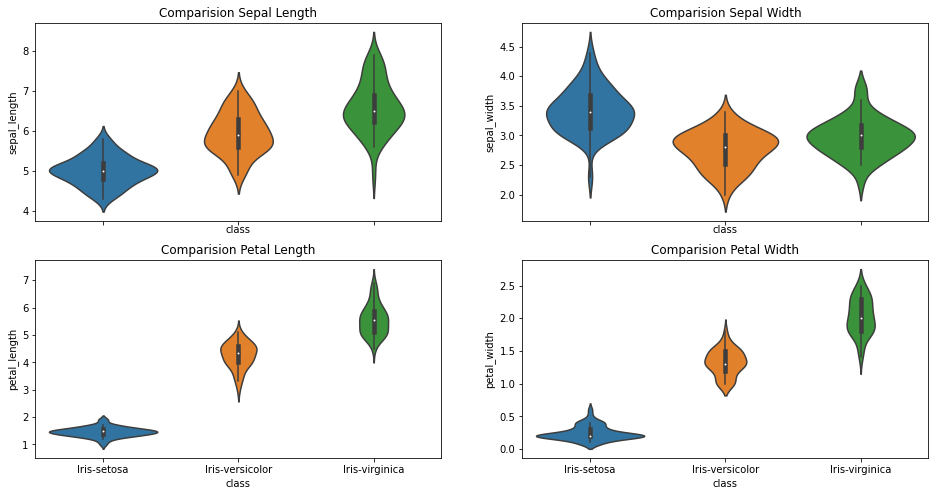

In [15]:
fig, axes = plt.subplots(2, 2, sharex = True, figsize = (16, 8))
sns.violinplot(x = "class", y = "sepal_length", data = df, ax = axes[0][0])
axes[0][0].set(title = "Comparision Sepal Length")
axes[0][0].xaxis.label.set_visible(True)
sns.violinplot(x = "class", y = "sepal_width", data = df, ax = axes[0][1])
axes[0][1].set(title = "Comparision Sepal Width")
axes[0][1].xaxis.label.set_visible(True)
sns.violinplot(x = "class", y = "petal_length", data = df, ax = axes[1][0])
axes[1][0].set(title = "Comparision Petal Length")
sns.violinplot(x = "class", y = "petal_width", data = df, ax = axes[1][1])
axes[1][1].set(title = "Comparision Petal Width")

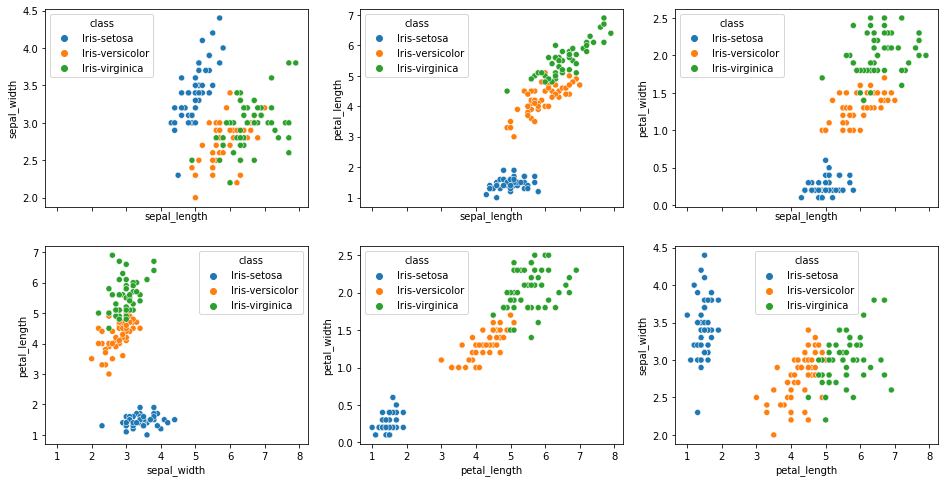

In [14]:
fig2, axes2 = plt.subplots(2, 3, sharex = True, figsize = (16, 8))
sns.scatterplot(x = "sepal_length", y = "sepal_width", hue = "class", data = df, ax = axes2[0][0])
axes2[0][0].xaxis.label.set_visible(True)
sns.scatterplot(x = "sepal_length", y = "petal_length", hue = "class", data = df, ax = axes2[0][1])
axes2[0][1].xaxis.label.set_visible(True)
sns.scatterplot(x = "sepal_length", y = "petal_width", hue = "class", data = df, ax = axes2[0][2])
axes2[0][2].xaxis.label.set_visible(True)
sns.scatterplot(x = "sepal_width", y = "petal_length", hue = "class", data = df, ax = axes2[1][0])
sns.scatterplot(x = "petal_length", y = "petal_width", hue = "class", data = df, ax = axes2[1][1])
sns.scatterplot(x = "petal_length", y = "sepal_width", hue = "class", data = df, ax = axes2[1][2])

## Models development

Classifications algorithms
* K - Nearest Neighbors
* Decision Trees

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Separate the dataframe in *faetures* and *target*

In [17]:
target = df["class"]
features = df.drop("class", axis = 1)

Target dataframe has datatype as object, we need to change the class to a categorical

Target
* "Iris-setosa" - 0
* "Iris-versicolor" - 1
* "Iris-virginica" - 2

In [18]:
df["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
type_iris = {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
target = target.map(type_iris)

In [20]:
target.value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

In [ ]:
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


prepare the array for target and features dataframes

In [21]:
X = np.asanyarray(features)
y = np.asanyarray(target)

print(X[0:5])
print(y[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Normalize the data with the library

In [22]:
standard = StandardScaler()

In [23]:
X_standard = standard.fit_transform(X)

Separate the data into training data and testing data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.2, random_state = 4)

print("The shape for training set: {}".format(X_train.shape[0]))
print("The shape for test set: {}".format(X_test.shape[0]))

The shape for training set: 120
The shape for test set: 30


### K Nearest Neighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

after looking the dataset, we have **three classes** for that intuition we can use *n_neighbors with value 3*

In [26]:
k = 3
#Create the model
knn = KNeighborsClassifier(n_neighbors = k)

#Train the model
knn.fit(X_train, y_train)

#Predict values with the model
y_hat_knn = knn.predict(X_test)

print("The original value: {}".format(y_test[0:5]))
print("The predicted value: {}".format(y_hat_knn[0:5]))

The original value: [2 0 2 2 2]
The predicted value: [2 0 2 2 2]


**Model evaluation**

In [27]:
print("the training accuracy: {}".format(metrics.accuracy_score(y_train, knn.predict(X_train))))
print("The test accucary: {}".format(metrics.accuracy_score(y_test, y_hat_knn)))

the training accuracy: 0.9583333333333334
The test accucary: 0.9


the accuracy with n = 3 is great value!, but we can look with different values and decide what is the more convinient value

In [28]:
Ks = 10
mean_acc_knn = np.zeros((Ks - 1))
std_acc_knn = np.zeros((Ks - 1))

for n in range(1, Ks):
  knn = KNeighborsClassifier(n_neighbors = n)
  knn.fit(X_train, y_train)
  y_hat = knn.predict(X_test)
  mean_acc_knn[n - 1] = metrics.accuracy_score(y_hat, y_test)
  std_acc_knn[n - 1] =  np.std(y_hat == y_test) / np.sqrt(y_hat.shape[0])

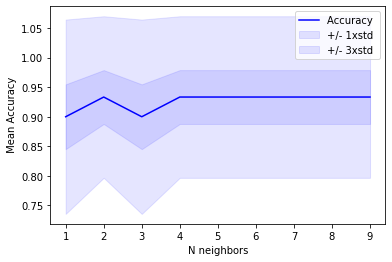

In [29]:
plt.plot(range(1, 10), mean_acc_knn, color = "blue")
plt.fill_between(range(1, 10), mean_acc_knn + std_acc_knn, mean_acc_knn - std_acc_knn, color = "blue", alpha = 0.1)
plt.fill_between(range(1, 10), mean_acc_knn + 3 * std_acc_knn, mean_acc_knn - 3 * std_acc_knn, color = "blue", alpha = 0.1)
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.xlabel("N neighbors")
plt.ylabel(" Mean Accuracy")
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc_knn.max(), "with k =", mean_acc_knn.argmax()+1) 

The best accuracy was with 0.9333333333333333 with k = 2


The previus plot shows different values of *k* and we can see the accuracy of each k

the higher accuracy = 0.93 is with a k = 2 but if we consider our dataset we do not have 2 classes, we have 3 classes and with k = 3 the accuracy is = 0.9

### Decision Trees

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
#Create the object model
dec_tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 2)
dec_tree

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [39]:
#Train the model
dec_tree.fit(X_train, y_train)

#Predict with the model
y_hat_dt = dec_tree.predict(X_test)

print("The original data: {}".format(y_test[0:5]))
print("The predicted values: {}".format(y_hat_dt[0:5]))

The original data: [2 0 2 2 2]
The predicted values: [2 0 2 2 2]


**Model evaluation**

In [40]:
print("Decision Tree's Accuracy: {}".format(metrics.accuracy_score(y_test, y_hat_dt)))

Decision Tree's Accuracy: 0.9666666666666667


*Visualization of the decision tree model*

In [41]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

Classes type

* "Iris-setosa"
* "Iris-versicolor"
* "Iris-virginica"

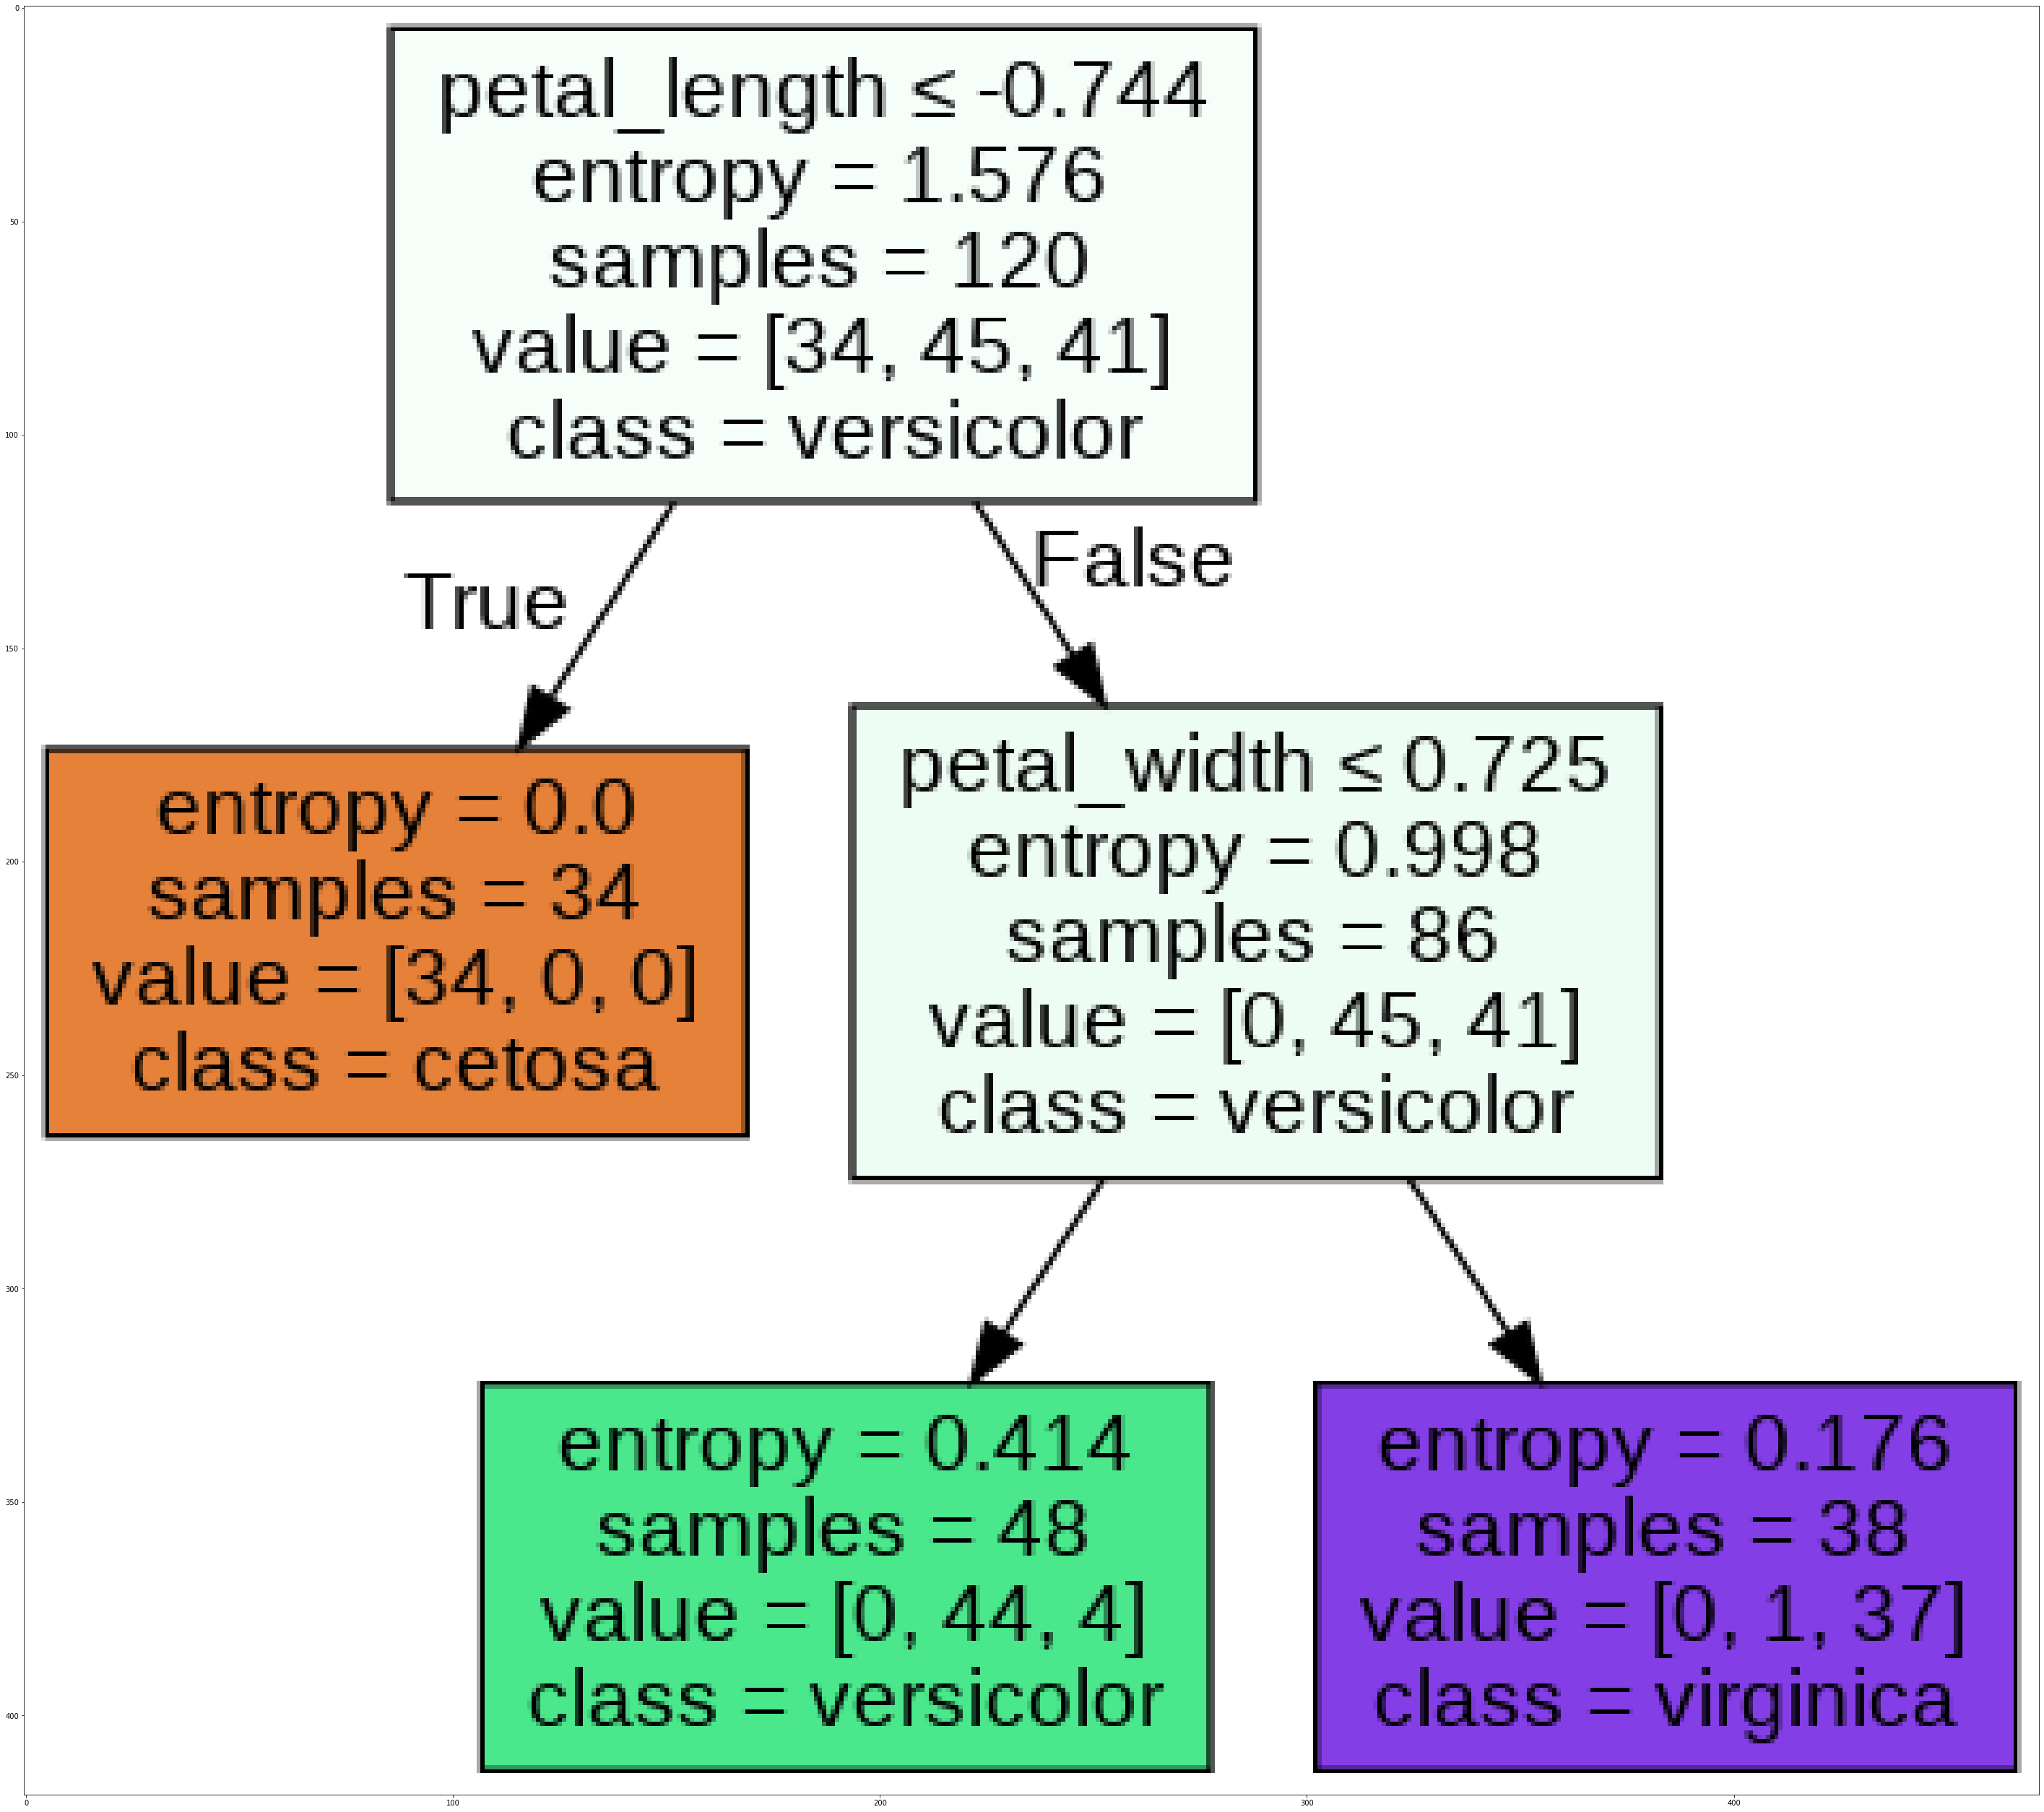

In [43]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:4]
out = tree.export_graphviz(dec_tree, feature_names = featureNames, out_file = dot_data, class_names = ["cetosa", "versicolor", "virginica"], filled = True,  
                         special_characters = True, rotate = False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(50, 100))
plt.imshow(img,interpolation='nearest')

**Summary**

Model development
* K - Nearest Neighbors - Accuracy = 0.90
* Decision Trees  - Accuracy = 0.96